### 1. Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os
import sys

### 2. Loading the dataset

In [2]:
sys.path.append(os.path.abspath('../scripts'))
from Eda_analysis import (load_data,headline_length,articles_per_publisher,publication_dates,plot_publication_trends,
                          sentiment_analysis,perform_topic_modeling,analyze_publication_times,identify_publication_spikes,
                          analyze_publishers,analyze_publisher_domains,analyze_news_types_by_publisher)

ModuleNotFoundError: No module named 'Eda_analysis'

In [5]:
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath("../scripts"))


In [9]:
from EDA_analysis import (
    load_data,
    analyze_headline_length,
    count_articles_per_publisher,
    analyze_publication_dates,
    plot_publication_trends,
    perform_sentiment_analysis,
    perform_topic_modeling,
    analyze_publication_times,
    identify_publication_spikes,
    analyze_publishers,
    analyze_publisher_domains,
    analyze_news_types_by_publisher
)


In [10]:
data=load_data('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype              
---  ------      --------------    -----              
 0   Unnamed: 0  1407328 non-null  int64              
 1   headline    1407328 non-null  object             
 2   url         1407328 non-null  object             
 3   publisher   1407328 non-null  object             
 4   date        1407328 non-null  datetime64[ns, UTC]
 5   stock       1407328 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 64.4+ MB


In [25]:
data.shape

(1407328, 6)

In [26]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [27]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [28]:
print(f"Start date: {data['date'].min()}")
print(f"End date: {data['date'].max()}")

Start date: 2009-02-14 00:00:00+00:00
End date: 2020-06-11 21:12:35+00:00


In [29]:
data['date'] = pd.to_datetime(data['date'], format='mixed', utc=True)


In [31]:
headline_stat = analyze_headline_length(data)
print("Headline Length Statistics:")
print(headline_stat)

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64



Top 10 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Active Publishers'}>

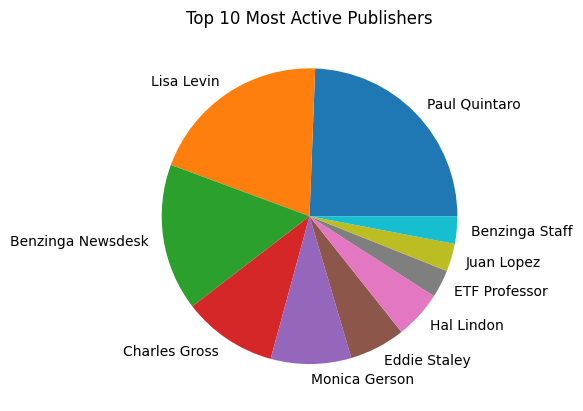

In [33]:
# Count the number of articles for each publisher
publisher_counts = count_articles_per_publisher(data)

# Display the top 10 most active publishers
print("\nTop 10 Most Active Publishers:")
print(publisher_counts.head(10))

# Plotting the top 10 most active publishers as a pie chart
publisher_counts.head(10).plot(kind="pie", title="Top 10 Most Active Publishers", ylabel='')



Top 10 Most Active Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Active Publishers'}>

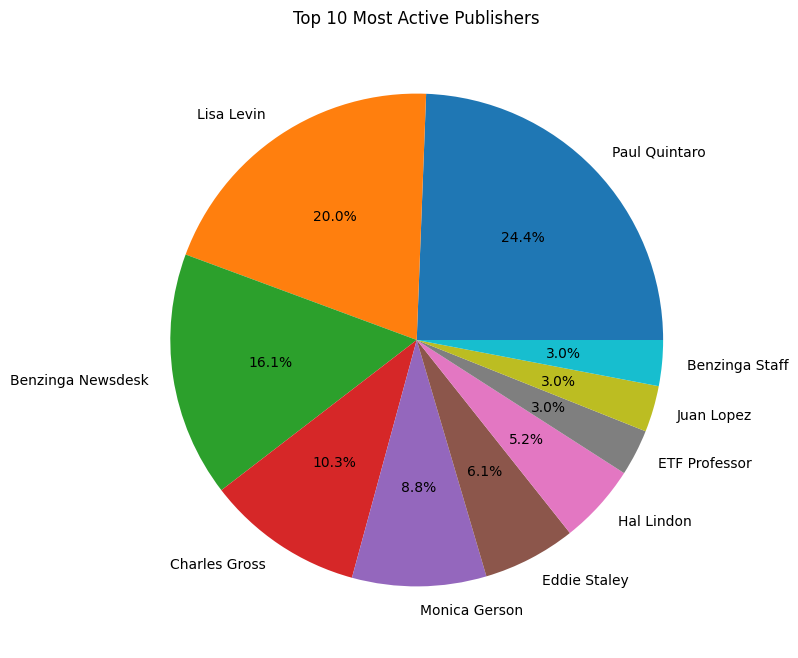

In [34]:
# Count articles per publisher and display top 10
publisher_counts = count_articles_per_publisher(data)

print("\nTop 10 Most Active Publishers:")
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Plot as a pie chart
top_publishers.plot(
    kind="pie",
    title="Top 10 Most Active Publishers",
    ylabel='',
    autopct='%1.1f%%',
    figsize=(8, 8)
)


In [35]:
# Analyze the publication dates
date_analysis = analyze_publication_dates(data)

# Display the top 5 days with the most articles
print("\nTop 5 Days with Most Articles:")
print(date_analysis['top_days'])

# Display article distribution by weekday
print("\nArticle Distribution by Weekday:")
print(date_analysis['weekday_counts'])

# Display monthly trends
print("\nMonthly Trends:")
print(date_analysis['monthly_counts'])


d:\KAIM\Week0_12\Week_1\AIM_Week_1\scripts\EDA_analysis.py:50: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = df.groupby(df['date'].dt.to_period('M').dt.to_timestamp()).size()



Top 5 Days with Most Articles:
date
2020-03-12    2739
2020-02-28    1620
2020-03-19    1595
2020-02-27    1567
2020-03-06    1428
dtype: int64

Article Distribution by Weekday:
date
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: count, dtype: int64

Monthly Trends:
date
2009-02-01        1
2009-04-01        3
2009-05-01       12
2009-06-01       40
2009-07-01       75
              ...  
2020-02-01    18878
2020-03-01    24995
2020-04-01    20757
2020-05-01    17992
2020-06-01     6447
Length: 136, dtype: int64


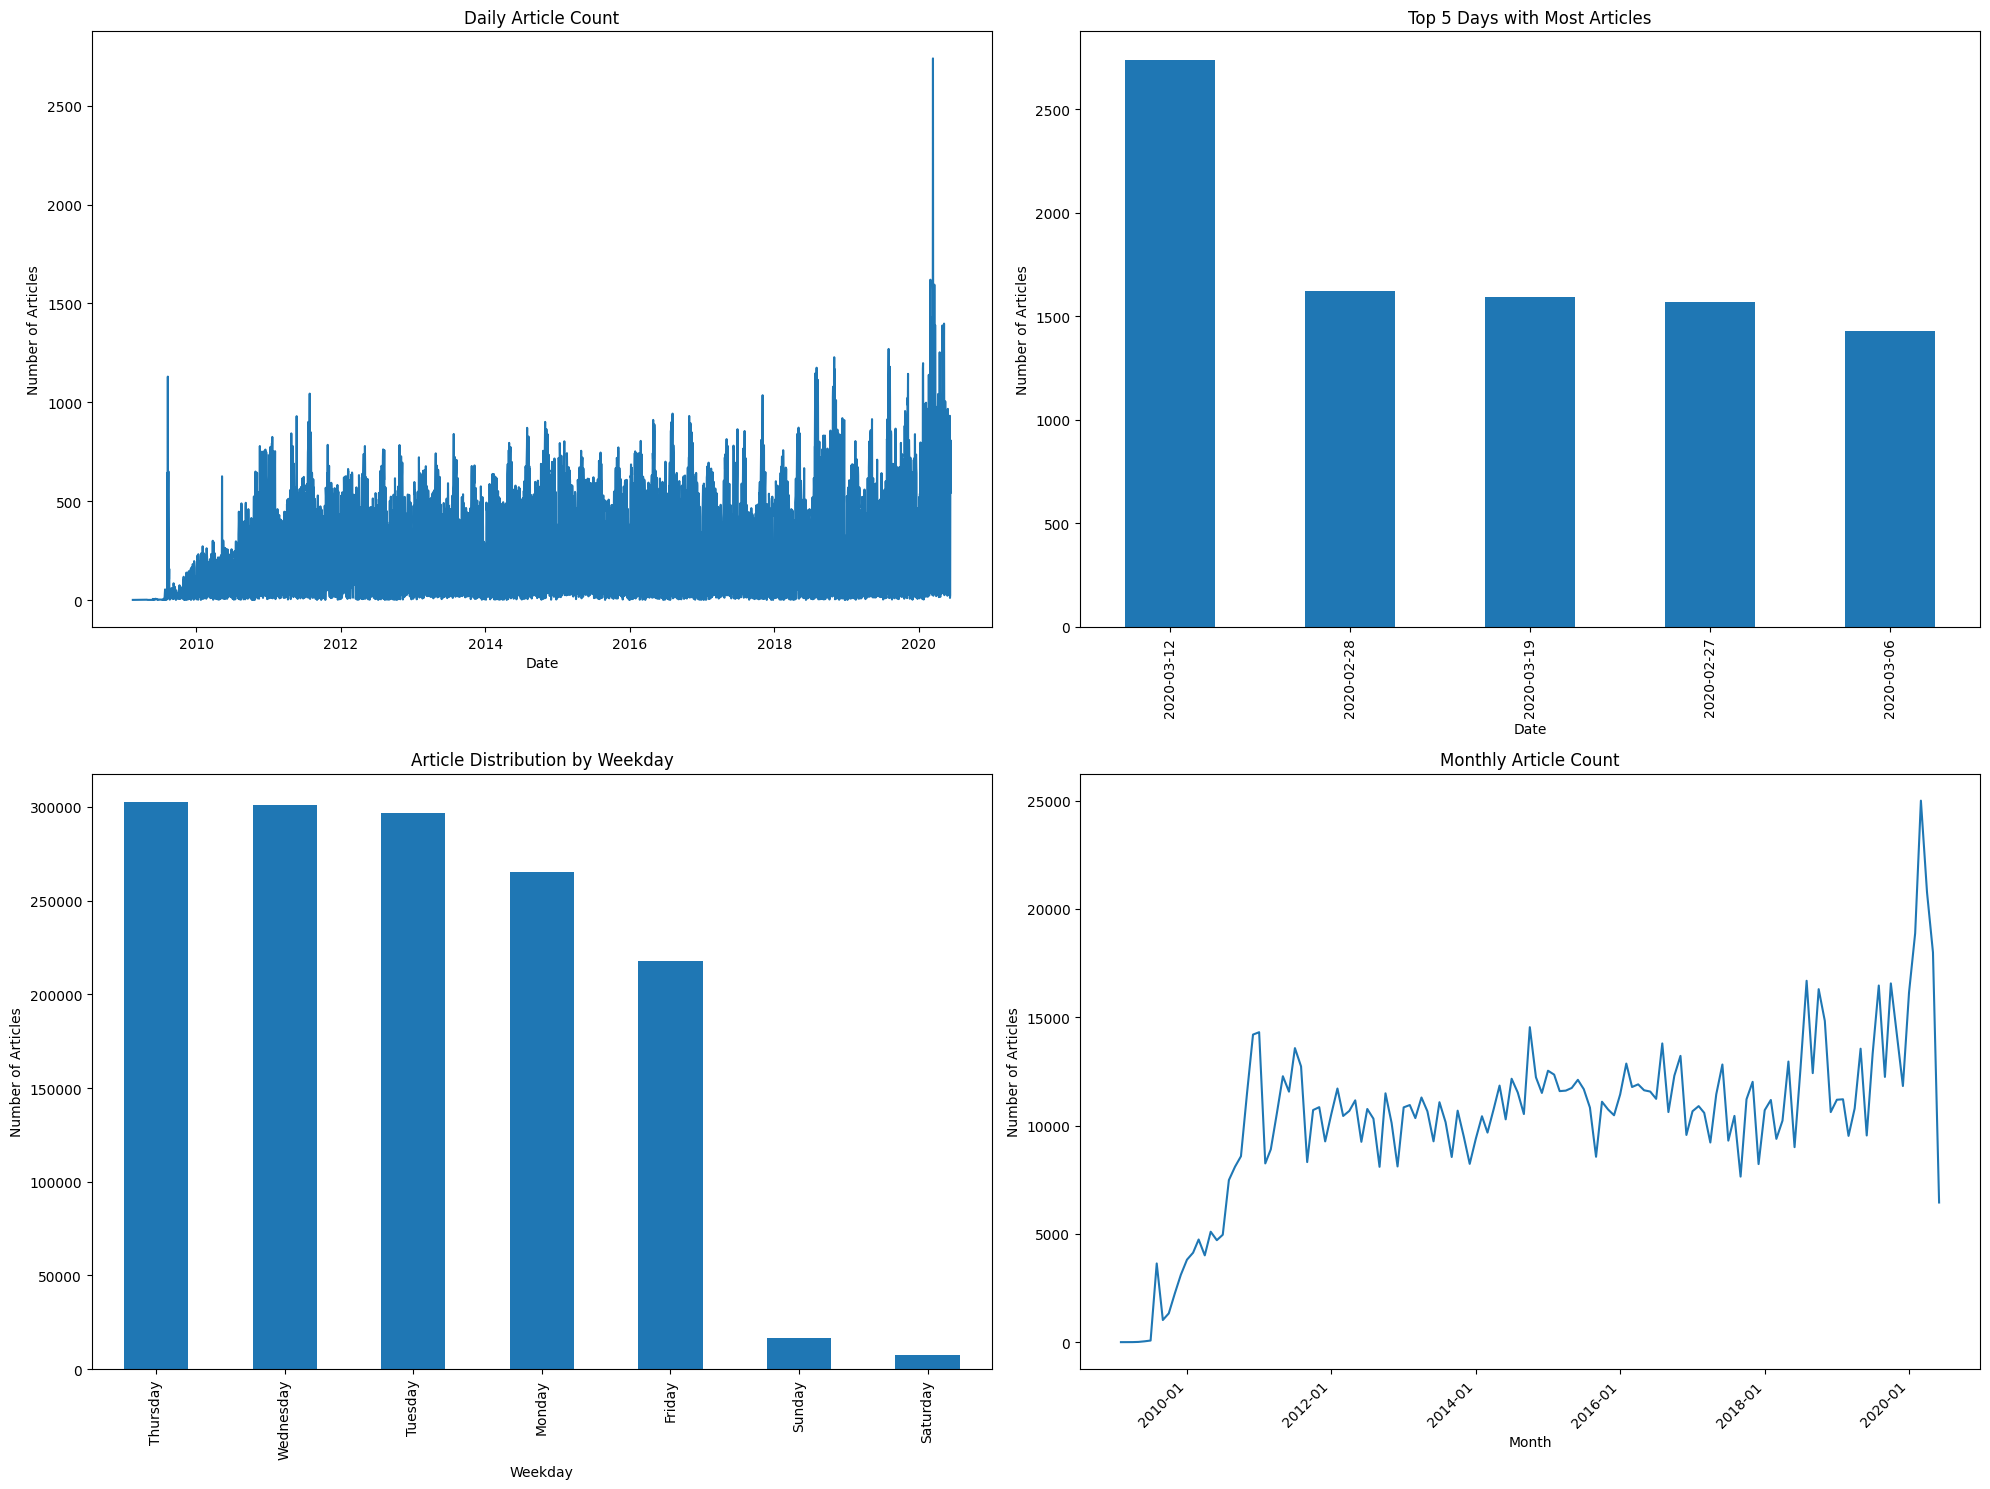

In [36]:
 # Plot publication trends
fig = plot_publication_trends(date_analysis)
plt.show()

In [38]:
# Perform sentiment analysis
df = perform_sentiment_analysis(data)

# Display sentiment distribution
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())


Sentiment Distribution:
sentiment
neutral     731893
positive    448740
negative    226695
Name: count, dtype: int64


In [39]:
# Sample sentiment analysis results
print("Sentiment Analysis Results:")
print(df[['headline', 'sentiment']])


Sentiment Analysis Results:
                                                  headline sentiment
0                  Stocks That Hit 52-Week Highs On Friday   neutral
1               Stocks That Hit 52-Week Highs On Wednesday   neutral
2                            71 Biggest Movers From Friday   neutral
3             46 Stocks Moving In Friday's Mid-Day Session   neutral
4        B of A Securities Maintains Neutral on Agilent...  positive
...                                                    ...       ...
1407323             Top Narrow Based Indexes For August 29  positive
1407324  Recap: Wednesday's Top Percentage Gainers and ...  negative
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   neutral
1407326  Oppenheimer Initiates China Zenix At Outperfor...   neutral
1407327  China Zenix Auto International Opens For Tradi...   neutral

[1407328 rows x 2 columns]


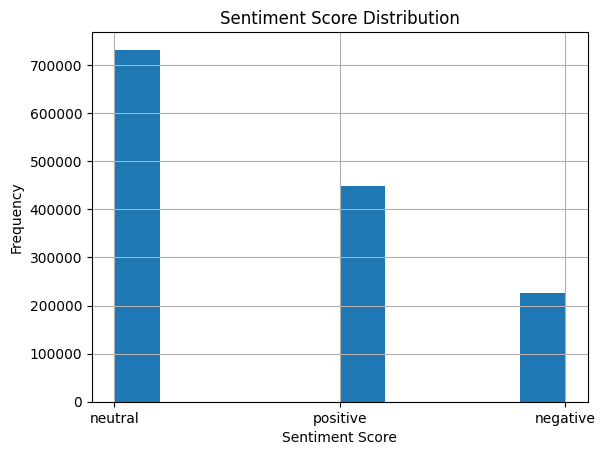

In [40]:
# Histogram for the distribution of sentiment scores
df["sentiment"].hist()
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [41]:
# Perform topic modeling
topics = perform_topic_modeling(df)

print("\nTop 5 Topics:")
# Display top words for each topic
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}:")
    for word, prob in topic:
        print(f"  {word}: {prob:.4f}")



Top 5 Topics:
Topic 1:
  earnings: 64829.9021
  stocks: 33587.0209
  benzinga: 32977.6842
  scheduled: 32838.1992
  etfs: 29217.1984
  watch: 25318.5309
  etf: 20908.1978
  2018: 17356.8946
  2019: 15741.9942
  10: 13075.4761
Topic 2:
  shares: 82040.1477
  trading: 54414.5684
  stocks: 36362.8614
  says: 35134.5031
  companies: 34376.9434
  higher: 32167.5871
  week: 29835.5331
  stock: 27354.9868
  lower: 27309.4742
  52: 23777.4618
Topic 3:
  vs: 162099.1990
  est: 140604.1996
  eps: 128896.6694
  reports: 83186.0176
  sales: 77305.9833
  pt: 73066.1885
  buy: 62222.9272
  raises: 57801.3351
  maintains: 52961.0961
  target: 47630.3116
Topic 4:
  new: 46153.2639
  stocks: 43261.1838
  announces: 35639.9138
  week: 31627.4452
  52: 29576.0826
  reports: 25100.9047
  industry: 20981.0872
  set: 19391.5280
  highest: 15870.1965
  low: 15677.6193
Topic 5:
  market: 109874.8879
  mid: 58702.7821
  stocks: 48565.7337
  update: 48540.5619
  session: 45348.0770
  moving: 42289.1989
  day: 

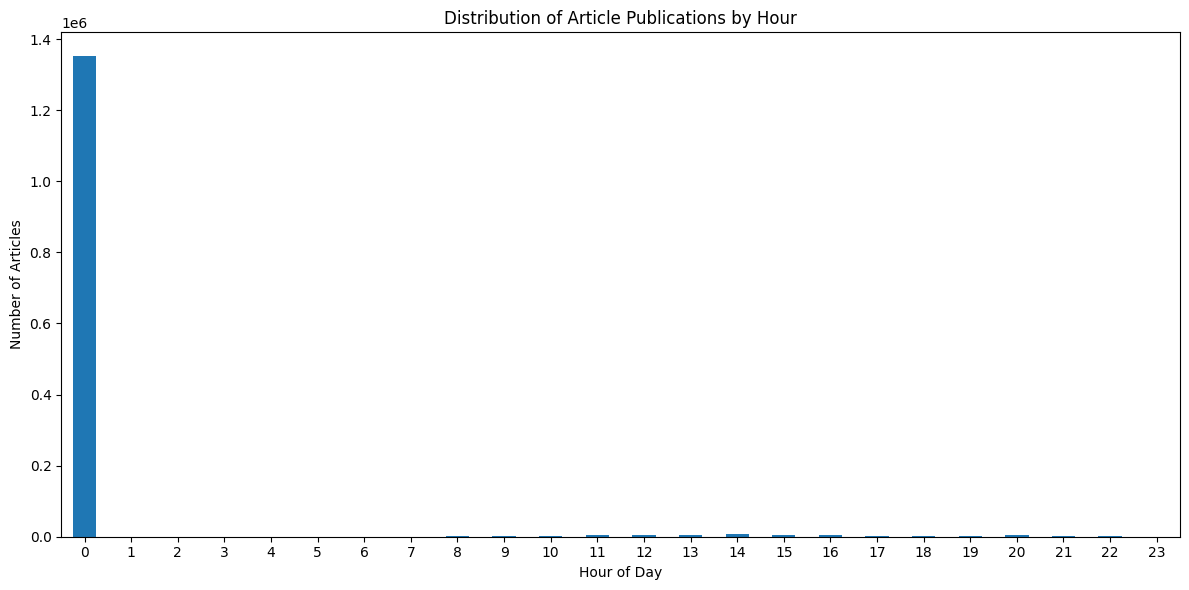

The peak publication hour is 0:00
Days with publication spikes:
date
2009-08-10    1130
2011-05-23     930
2011-07-28    1044
2016-08-04     943
2016-10-27     931
              ... 
2020-05-07    1398
2020-05-08     927
2020-05-13    1005
2020-05-26     967
2020-06-05     932
Length: 85, dtype: int64


In [42]:
# Time Series Analysis
print(analyze_publication_times(df))

# Identify publication spikes
spikes = identify_publication_spikes(df)
print("Days with publication spikes:")
print(spikes)


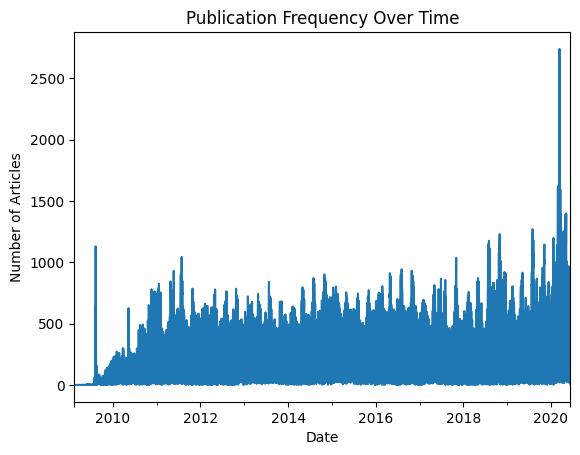

In [43]:
# Convert 'date' column to datetime format
df['publication_date'] = pd.to_datetime(df['date'])

# Extract the day name from the publication date
df['publication_day'] = df['publication_date'].dt.day_name()

# Group by publication day and count occurrences
publication_trends = df.groupby('publication_day').size()

# Time Series Analysis: Publication frequency over time
df['publication_time'] = df['publication_date'].dt.time
df.set_index('publication_date').resample('D').size().plot()

# Plot settings
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


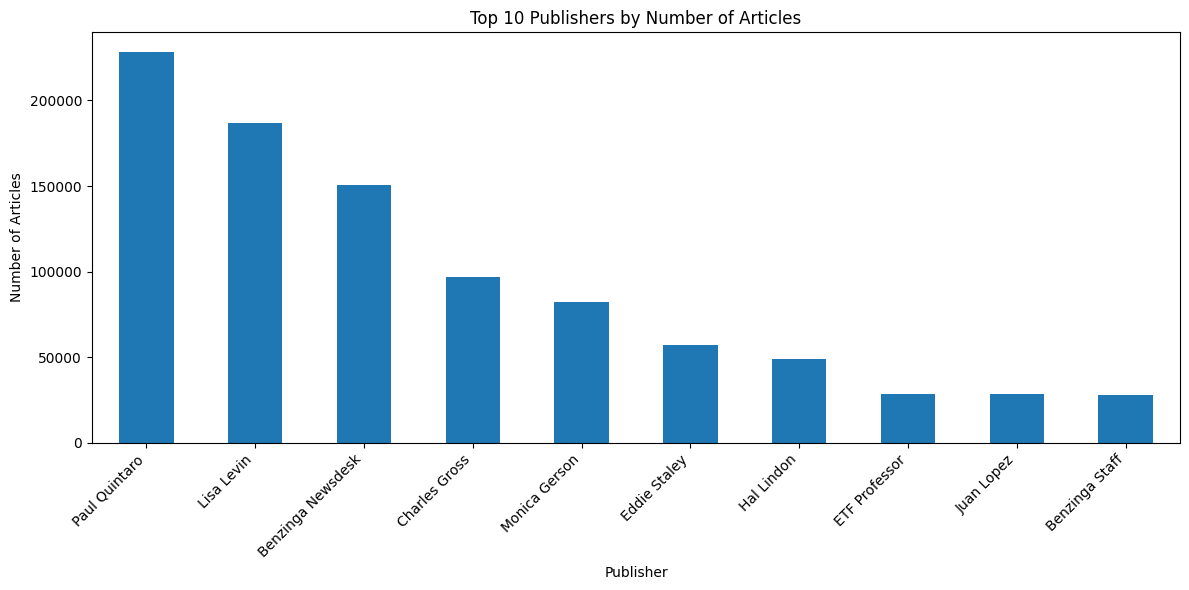


Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


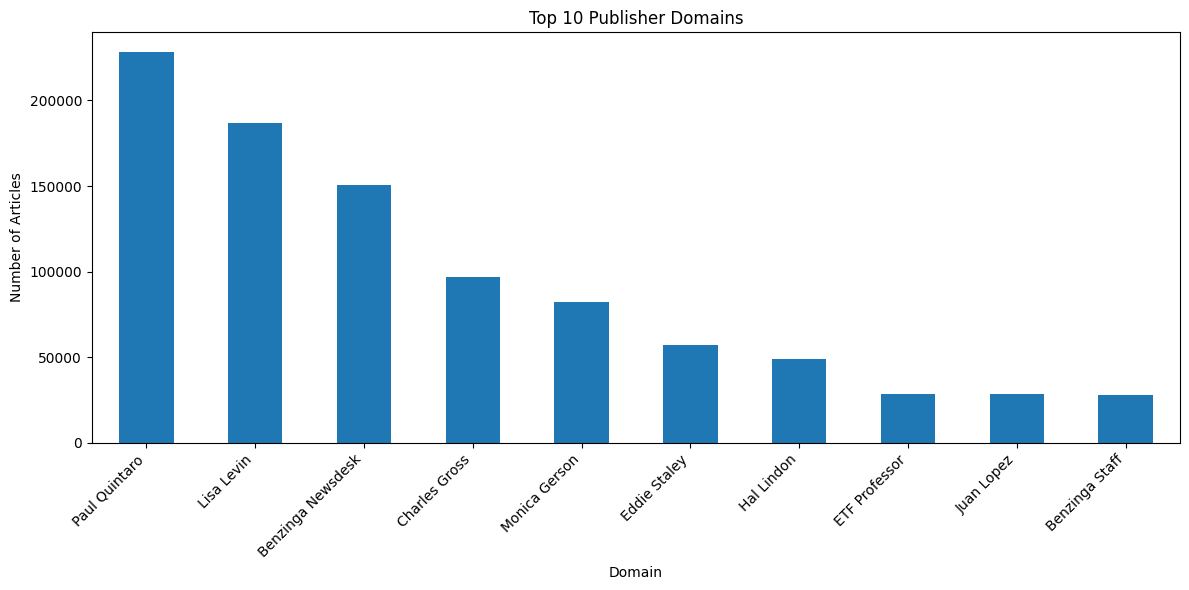


Top Domains:
domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


In [44]:
# Analyze top publishers
top_publishers = analyze_publishers(df)
print("\nTop Publishers:")
print(top_publishers)

# Analyze publisher domains
domain_counts = analyze_publisher_domains(df)
print("\nTop Domains:")
print(domain_counts.head())


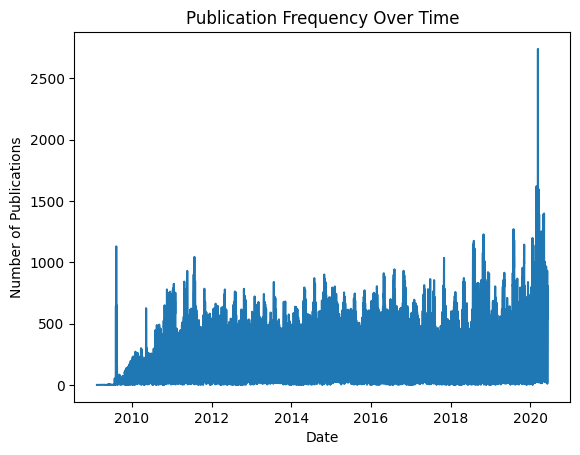

In [45]:
# Extract year, month, day, hour, minute, and weekday from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['weekday'] = data['date'].dt.weekday  # Monday=0, Sunday=6

# Group by date to count publications per day
daily_counts = data.groupby(data['date'].dt.date).size()

# Plot the publication frequency over time
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()


In [46]:
publisher_time_analysis = df.groupby('publisher')['publication_time'].value_counts()
print("Analysis of Publishing Times by Publishers:")
print(publisher_time_analysis)

Analysis of Publishing Times by Publishers:
publisher                  publication_time
47ertrends                 00:00:00               18
AARP                       00:00:00                4
                           15:54:21                2
                           16:08:29                1
ABNNewswire                00:00:00               13
                                               ...  
vivek.proactive@gmail.com  13:46:20                1
                           15:44:36                1
wallstreet1928             00:00:00                8
webmaster                  00:00:00            20312
                           13:06:54                1
Name: count, Length: 34333, dtype: int64


Top Publishers by Number of Contributions:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


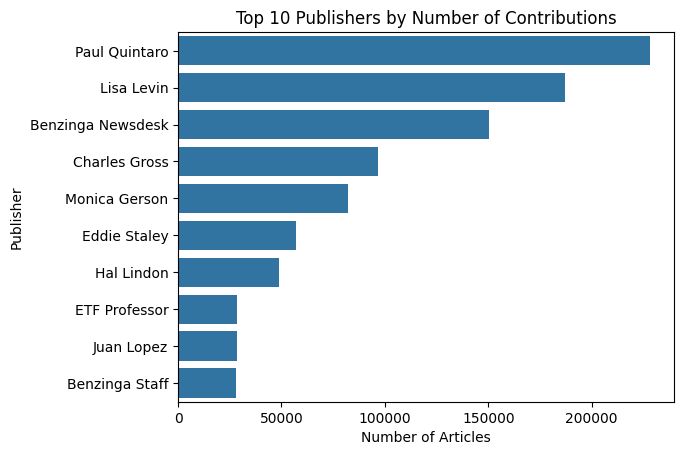

In [47]:
# Step 1: Count Contributions by Publisher
publisher_counts = data['publisher'].value_counts()
print("Top Publishers by Number of Contributions:")
print(publisher_counts.head(10))  # Display top 10 publishers

# Create a bar plot for the top 10 publishers
sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Publishers by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


In [48]:
# Step 2: Analyze News Variety by Publisher (based on unique stock symbols mentioned)
# We'll assess how diverse each publisher's coverage is by counting the unique stock symbols they report on

# Count the number of unique stocks reported by each publisher
unique_stocks_per_publisher = data.groupby('publisher')['stock'].nunique()

# Identify the top 10 publishers with the most diverse stock coverage
top_publishers = unique_stocks_per_publisher.sort_values(ascending=False).head(10)

# Display the results
print("\nTop 10 Publishers by Number of Unique Stocks Reported:")
print(top_publishers)



Top 10 Publishers by Number of Unique Stocks Reported:
publisher
Paul Quintaro        4703
Lisa Levin           4640
Hal Lindon           4474
Eddie Staley         4466
Charles Gross        4181
Benzinga Newsdesk    4049
Monica Gerson        4012
Benzinga Staff       3233
Allie Wickman        3009
Benzinga_Newsdesk    2924
Name: stock, dtype: int64


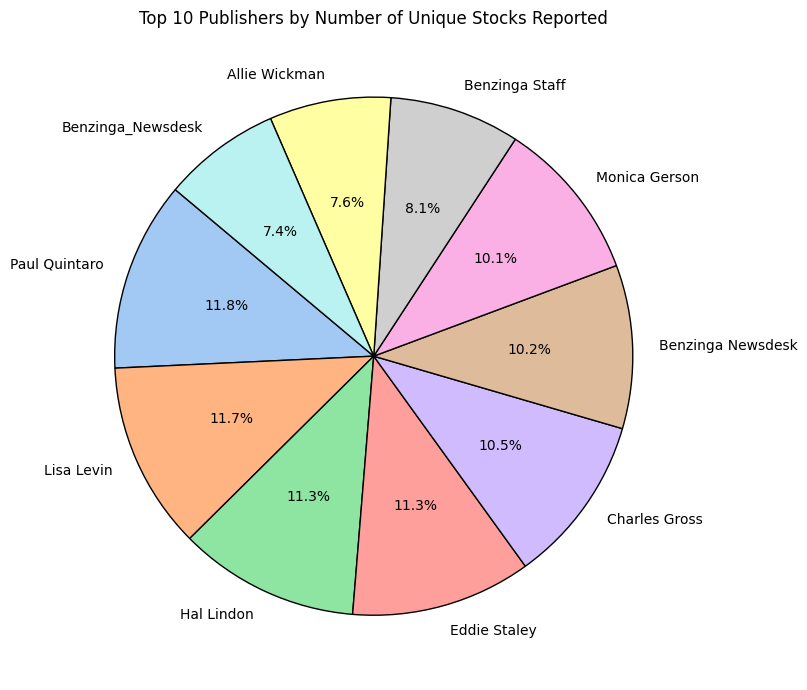

In [49]:
# Step 3: Visualize the Top Publishers by Unique Stock Coverage Using a Pie Chart
plt.figure(figsize=(10, 7))

# Create the pie chart
top_publishers.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)

# Add a title and remove the y-axis label for better aesthetics
plt.title('Top 10 Publishers by Number of Unique Stocks Reported')
plt.ylabel('')  # Hide y-label for a cleaner look
plt.tight_layout()
plt.show()


In [50]:
# Step 3: Analyze Email Domains from Publisher Field (if applicable)
# Extract domain names from publishers that appear to be email addresses

# Extract domain from email-like publisher entries
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)

# Count the number of contributions from each domain
domain_counts = data['domain'].value_counts(dropna=True)

# Display the top 10 contributing domains
print("\nTop 10 Email Domains by Number of Contributions:")
print(domain_counts.head(10))



Top 10 Email Domains by Number of Contributions:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


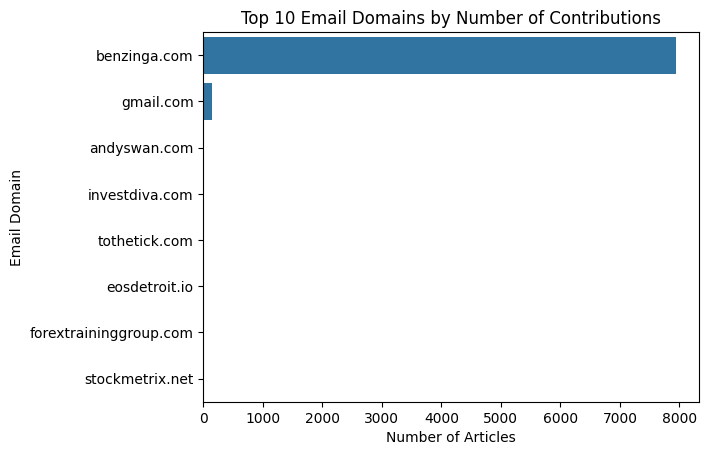

In [51]:

sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index)
plt.title('Top 10 Email Domains by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Email Domain')
plt.show()